<a href="https://colab.research.google.com/github/SriramExpert/Waste-Object-detection-model/blob/main/Google_Colab/Garbage_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🚀 Overview**
This notebook provides an end-to-end pipeline for training/fine-tuning and inferencing with a YOLO-based object detection model. Key features:

      ✔ Load custom datasets in YOLO format

      ✔ Train/fine-tune a model (optional)

      ✔ Run inference on images/videos

      ✔ Visualize results


# **📂 Dataset Structure (YOLO Format)**

        dataset/  
        ├── images/          # Training images (.jpg, .png)  
        │   ├── train/  
        │   └── val/  
        └── labels/          # YOLO annotation files (.txt)  
            ├── train/  
            └── val/  

**Step 1:** MOUNT YOUR GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 2:** VERIFY YOUR RUNTIME ENVIRONMENT

      Go to Edit -> Notebook settings -> T4(GPU)

In [ ]:
!nvidia-smi

Mon Jul  7 10:49:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 3:** Create the folder in drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

# Create the folder (if it doesn't exist)
!mkdir -p "/content/drive/MyDrive/Garbage_detection_model"

print("Folder created: /content/drive/MyDrive/Garbage_detection_model")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder created: /content/drive/MyDrive/Garbage_detection_model


**Step 4:** Clone my Repository for images and labels

place the images and label in Garbage_detection_model folder


**Step 5:** Place the images and label folder in created repository and verify the images and label folder exists in Garbage_detection_model

In [ ]:
import os

# Path to your Garbage_detection_model folder in Google Drive
target_dir = "/content/drive/MyDrive/Garbage_detection_model"

# Check if directory exists
if not os.path.exists(target_dir):
    print(f"Error: Directory '{target_dir}' does not exist!")
else:
    print(f"Directory found: {target_dir}")

    # Verify images and labels folders
    required_folders = ['images', 'labels']
    missing_folders = [folder for folder in required_folders
                      if not os.path.exists(os.path.join(target_dir, folder))]

    if missing_folders:
        print(f"Missing folders: {', '.join(missing_folders)}")
    else:
        print("All required folders exist!")
        print("\nFolder contents:")
        for folder in required_folders:
            files = os.listdir(os.path.join(target_dir, folder))
            print(f"{folder}/: {len(files)} files")

Directory found: /content/drive/MyDrive/Garbage_detection_model
All required folders exist!

Folder contents:
images/: 251 files
labels/: 251 files


# **Ok lets starts our Model**

**1. INSTALLATION**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

**2. Dataset Preparation – Train/Val/Test Split**



   This script organizes a custom YOLO dataset by splitting images and their corresponding labels into structured training (70%), validation (20%), and test (10%) sets. It automatically creates the necessary directory structure and ensures each image is matched with its correct annotation file. The randomized shuffling guarantees balanced data distribution across all splits for effective model training and evaluation.


In [ ]:
import os
import shutil
import random
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Updated Paths for Google Drive
base_dir = "/content/drive/MyDrive/Garbage_detection_model"
original_images = os.path.join(base_dir, "images")
original_labels = os.path.join(base_dir, "labels")
dataset_dir = base_dir

# Verify source folders exist
print("Verifying source directories...")
assert os.path.exists(original_images), f"Images folder not found at {original_images}"
assert os.path.exists(original_labels), f"Labels folder not found at {original_labels}"
print("✓ Source directories verified\n")

# Create train/val/test folders
print("Creating dataset structure...")
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(dataset_dir, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(dataset_dir, split, "labels"), exist_ok=True)
print("✓ Dataset structure created\n")

# Get and shuffle image files
image_files = [f for f in os.listdir(original_images) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(image_files)

# Split dataset (70-20-10)
total_files = len(image_files)
train_split = int(0.7 * total_files)
val_split = int(0.2 * total_files)

train_files = image_files[:train_split]
val_files = image_files[train_split:train_split + val_split]
test_files = image_files[train_split + val_split:]

def copy_files(files, split):
    """Helper function to copy files with verification"""
    for file in files:
        # Copy image
        img_src = os.path.join(original_images, file)
        img_dest = os.path.join(dataset_dir, split, "images", file)
        shutil.copy2(img_src, img_dest)

        # Copy corresponding label
        label_file = os.path.splitext(file)[0] + ".txt"
        label_src = os.path.join(original_labels, label_file)
        label_dest = os.path.join(dataset_dir, split, "labels", label_file)

        if not os.path.exists(label_src):
            print(f"⚠ Warning: Missing label for {file}")
        else:
            shutil.copy2(label_src, label_dest)

# Copy files to respective folders
print("Copying files...")
copy_files(train_files, "train")
copy_files(val_files, "val")
copy_files(test_files, "test")

# Final summary
print("\nDataset split complete:")
print(f"Total images: {total_files}")
print(f"Train set: {len(train_files)} images ({len(train_files)/total_files:.0%})")
print(f"Validation set: {len(val_files)} images ({len(val_files)/total_files:.0%})")
print(f"Test set: {len(test_files)} images ({len(test_files)/total_files:.0%})")

# Verification
print("\nVerifying destination files...")
for split in ["train", "val", "test"]:
    imgs = len(os.listdir(os.path.join(dataset_dir, split, "images")))
    lbls = len(os.listdir(os.path.join(dataset_dir, split, "labels")))
    print(f"{split.upper()}: {imgs} images, {lbls} labels ({'✓' if imgs==lbls else '⚠ Mismatch!'})")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Verifying source directories...
✓ Source directories verified

Creating dataset structure...
✓ Dataset structure created

Copying files...

Dataset split complete:
Total images: 251
Train set: 175 images (70%)
Validation set: 50 images (20%)
Test set: 26 images (10%)

Verifying destination files...
TRAIN: 175 images, 175 labels (✓)
VAL: 50 images, 50 labels (✓)
TEST: 26 images, 26 labels (✓)


**3. Dataset Validation & Cleaning**

    Verifies image-label pairs and handles mismatches to ensure dataset integrity.

In [ ]:
import os

def check_missing_labels(dataset_path):
    """Identifies images without corresponding label files in train/val/test splits"""
    for split in ["train", "val", "test"]:
        image_dir = os.path.join(dataset_path, split, "images")
        label_dir = os.path.join(dataset_path, split, "labels")

        # Get filenames without extensions
        images = set(os.path.splitext(f)[0] for f in os.listdir(image_dir))
        labels = set(os.path.splitext(f)[0] for f in os.listdir(label_dir))

        missing = images - labels
        print(f"{split.upper()}: {len(missing)} missing labels: {list(missing)[:5]}...")

check_missing_labels("/content/drive/MyDrive/Garbage_detection_model")

TRAIN: 0 missing labels: []...
VAL: 0 missing labels: []...
TEST: 0 missing labels: []...


Note: If any mismatches in the above output..

          TRAIN: 3 missing labels: ['paper340_jpg.rf.90a0202', 'plastic12_jpg.rf.a1b2c3d', ...]
          VAL: 0 missing labels: []
          TEST: 1 missing labels: ['metal8_jpg.rf.x7y8z9']

Like this.. Run the below code

In [ ]:
import os

def remove_unpaired_files(dataset_path):
    """Deletes images without corresponding labels and vice versa"""
    for split in ["train", "val", "test"]:
        image_dir = os.path.join(dataset_path, split, "images")
        label_dir = os.path.join(dataset_path, split, "labels")

        # Get filename stems
        images = {os.path.splitext(f)[0] for f in os.listdir(image_dir)}
        labels = {os.path.splitext(f)[0] for f in os.listdir(label_dir)}

        # Remove unpaired images
        for missing in images - labels:
            img_path = os.path.join(image_dir, f"{missing}.jpg")
            os.remove(img_path)
            print(f"Removed unpaired image: {img_path}")

        # Remove unpaired labels
        for missing in labels - images:
            lbl_path = os.path.join(label_dir, f"{missing}.txt")
            os.remove(lbl_path)
            print(f"Removed unpaired label: {lbl_path}")

remove_unpaired_files("/content/drive/MyDrive/Garbage_detection_model")

Complete the above step and

**Again Re-run the step 3**

**4. Dataset Structure Verification**

        Validates the existence of required image/label folders in all dataset splits

        Purpose
        This code checks whether your dataset is properly organized with the correct folder structure before training:

        Ensures images and labels subfolders exist in each split (train, val, test)

        Helps catch missing directories early to prevent training errors

# **📂 Dataset Structure (YOLO Format)**
              dataset/  
              ├── images/          # Training images (.jpg, .png)  
              │   ├── train/  
              │   └── val/  
              └── labels/          # YOLO annotation files (.txt)  
                  ├── train/  
                  └── val/  

In [ ]:
import os

splits = ["train", "val", "test"]
base_path = "/content/drive/MyDrive/Garbage_detection_model"

for split in splits:
    img_dir = os.path.join(base_path, split, "images")
    label_dir = os.path.join(base_path, split, "labels")
    print(f"{split.upper()}:")
    print(f"  Images: {img_dir} exists? {os.path.exists(img_dir)}")
    print(f"  Labels: {label_dir} exists? {os.path.exists(label_dir)}")

TRAIN:
  Images: /content/drive/MyDrive/Garbage_detection_model/train/images exists? True
  Labels: /content/drive/MyDrive/Garbage_detection_model/train/labels exists? True
VAL:
  Images: /content/drive/MyDrive/Garbage_detection_model/val/images exists? True
  Labels: /content/drive/MyDrive/Garbage_detection_model/val/labels exists? True
TEST:
  Images: /content/drive/MyDrive/Garbage_detection_model/test/images exists? True
  Labels: /content/drive/MyDrive/Garbage_detection_model/test/labels exists? True


**5. Dataset Configuration (data.yaml)**

    Creates the YAML configuration file required for YOLOv8 training

In [ ]:
import yaml
import os

# Configuration
config = {
    'path': '/content/drive/MyDrive/Garbage_detection_model',  # Base dataset path
    'train': 'train/images',
    'val': 'val/images',
    'test': 'test/images',
    'nc': 6,
    'names': ['Metal', 'Paper', 'Plastic', 'Random Trash', 'cardboard', 'glass']
}

# Create directory if not exists
os.makedirs(config['path'], exist_ok=True)

# Save YAML file
yaml_path = os.path.join(config['path'], 'data.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(config, f, sort_keys=False)

print(f"✅ YAML configuration saved to:\n{yaml_path}")
print("\nFile content:")
with open(yaml_path, 'r') as f:
    print(f.read())

✅ YAML configuration saved to:
/content/drive/MyDrive/Garbage_detection_model/data.yaml

File content:
path: /content/drive/MyDrive/Garbage_detection_model
train: train/images
val: val/images
test: test/images
nc: 6
names:
- Metal
- Paper
- Plastic
- Random Trash
- cardboard
- glass



**6. Model Training with YOLOv8**

      Train your custom garbage detection model using Ultralytics YOLOv8

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # Nano model (fastest)

# Start training with custom output directory
results = model.train(
    data="/content/drive/MyDrive/Garbage_detection_model/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    project="/content/drive/MyDrive/Garbage_detection_model/run/detect",  # Custom project path
    name="garbage_detection_colab"  # Subfolder name
)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Garbage_detection_model/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=garbage_detection_colab, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

train: Scanning /content/drive/MyDrive/Garbage_detection_model/train/labels.cache... 175 images, 0 backgrounds, 0 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.3±1.4 ms, read: 22.2±11.3 MB/s, size: 35.7 KB)


val: Scanning /content/drive/MyDrive/Garbage_detection_model/val/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.23G     0.7092      3.428      1.244         44        640: 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]


                   all         50         50    0.00408          1       0.16      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.39G     0.5267      3.106      1.131         43        640: 100%|██████████| 11/11 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50         50    0.00689          1      0.207      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.39G     0.4732      2.619      1.093         44        640: 100%|██████████| 11/11 [00:04<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         50         50     0.0116          1      0.196      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.39G     0.5254      2.313      1.105         41        640: 100%|██████████| 11/11 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         50         50      0.736      0.128      0.333      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.39G     0.5525      2.098      1.123         37        640: 100%|██████████| 11/11 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         50         50      0.426       0.46        0.4      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.39G     0.4775      1.875      1.066         32        640: 100%|██████████| 11/11 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         50         50      0.493      0.352      0.386      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.39G     0.5226      1.811      1.066         44        640: 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         50         50      0.453      0.439      0.365      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.39G     0.5447      1.819      1.134         45        640: 100%|██████████| 11/11 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50         50      0.566      0.325      0.353      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.39G      0.517      1.735      1.098         42        640: 100%|██████████| 11/11 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         50         50      0.811      0.219      0.361      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.39G     0.5576      1.675        1.1         44        640: 100%|██████████| 11/11 [00:03<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         50         50      0.498      0.438      0.383      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.39G     0.5064      1.558      1.053         49        640: 100%|██████████| 11/11 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         50         50      0.377      0.467      0.442       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.39G     0.4979      1.649      1.064         45        640: 100%|██████████| 11/11 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         50         50      0.539      0.441      0.461      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.39G     0.5044      1.566      1.079         44        640: 100%|██████████| 11/11 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         50         50      0.496      0.364      0.402       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.39G     0.5235      1.541       1.09         39        640: 100%|██████████| 11/11 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         50         50      0.577      0.505      0.514       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.39G     0.5045      1.485      1.062         45        640: 100%|██████████| 11/11 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         50         50      0.555      0.409      0.472      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.39G     0.4792       1.39      1.049         49        640: 100%|██████████| 11/11 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         50         50      0.801      0.404      0.545      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.39G     0.4654      1.382      1.041         46        640: 100%|██████████| 11/11 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50         50      0.672      0.504       0.54      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.39G     0.5013      1.429      1.069         49        640: 100%|██████████| 11/11 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         50         50      0.584      0.524      0.538       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.39G     0.4408      1.234      1.039         47        640: 100%|██████████| 11/11 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         50         50      0.515      0.623      0.623      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.39G     0.4515      1.252      1.045         42        640: 100%|██████████| 11/11 [00:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         50         50      0.549      0.644      0.594      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.39G     0.4369      1.263       1.03         38        640: 100%|██████████| 11/11 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         50         50      0.502      0.664      0.663      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.39G     0.4291      1.185       1.03         48        640: 100%|██████████| 11/11 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         50         50      0.553      0.656      0.695       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.39G      0.428      1.134       1.02         41        640: 100%|██████████| 11/11 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         50         50      0.629      0.668      0.695       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.39G     0.4438      1.166      1.027         43        640: 100%|██████████| 11/11 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         50         50       0.45      0.505      0.499      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.39G     0.4269      1.209      1.001         42        640: 100%|██████████| 11/11 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         50         50      0.564      0.494      0.519      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.39G     0.4216      1.213      1.013         46        640: 100%|██████████| 11/11 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         50         50      0.765      0.455      0.657      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.39G     0.3954      1.126     0.9987         44        640: 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50         50      0.663      0.591      0.697      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.39G     0.3882      1.112     0.9822         41        640: 100%|██████████| 11/11 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         50         50      0.606      0.614      0.665      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.39G     0.4039       1.06     0.9933         44        640: 100%|██████████| 11/11 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         50         50      0.491      0.739      0.653      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.39G     0.3779      0.976      1.005         44        640: 100%|██████████| 11/11 [00:03<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         50         50      0.846      0.535      0.691       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.39G     0.3991      1.041      1.008         47        640: 100%|██████████| 11/11 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         50         50      0.647      0.606      0.715      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.39G      0.381     0.9284     0.9731         50        640: 100%|██████████| 11/11 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         50         50      0.572      0.692      0.692      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.39G     0.3838     0.9664     0.9793         52        640: 100%|██████████| 11/11 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         50         50       0.66      0.631      0.738      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.39G       0.37     0.9461     0.9715         45        640: 100%|██████████| 11/11 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         50         50      0.845      0.528       0.77      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.39G     0.3681     0.9174     0.9771         38        640: 100%|██████████| 11/11 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         50         50      0.808       0.54      0.771      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.39G     0.3586     0.9121      1.004         37        640: 100%|██████████| 11/11 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         50         50      0.874      0.587      0.766      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.39G     0.3182     0.8515     0.9396         44        640: 100%|██████████| 11/11 [00:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         50         50      0.716      0.667      0.752      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.39G     0.3389     0.8504      0.965         39        640: 100%|██████████| 11/11 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         50         50      0.633      0.695      0.792      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.39G     0.3382     0.8326     0.9605         49        640: 100%|██████████| 11/11 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         50         50      0.616      0.749      0.784      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.39G     0.3387     0.8124     0.9659         44        640: 100%|██████████| 11/11 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         50         50       0.52      0.785      0.786      0.738


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.39G     0.3631      1.446      1.072         17        640: 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         50         50      0.534      0.753      0.771      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.39G     0.2873      1.154     0.9955         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         50         50      0.596      0.645      0.694      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.39G     0.3148      1.234      1.018         15        640: 100%|██████████| 11/11 [00:03<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         50         50      0.814      0.581      0.702      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.39G     0.2961      1.181       1.03         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50         50      0.715      0.574      0.703      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.39G     0.2766       1.02      1.002         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         50         50      0.718      0.635      0.733      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.39G     0.2801      1.036      1.021         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         50         50      0.738      0.723      0.782      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.39G     0.2571     0.9434      0.983         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         50         50      0.819      0.655      0.776      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.39G     0.2371     0.9182     0.9537         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         50         50      0.676      0.672      0.765      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.39G     0.2404     0.9213     0.9678         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         50         50      0.675      0.671      0.774      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.39G     0.2431     0.9274     0.9577         15        640: 100%|██████████| 11/11 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         50         50      0.684      0.672      0.778      0.753



50 epochs completed in 0.060 hours.
Optimizer stripped from /content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]


                   all         50         50      0.685      0.672      0.778      0.753
                 Metal          7          7          1      0.421      0.875      0.875
                 Paper         15         15      0.702      0.933      0.944      0.892
               Plastic          5          5      0.352        0.6      0.592      0.576
          Random Trash          5          5      0.636        0.4      0.486      0.486
             cardboard         11         11      0.797      0.818      0.956      0.928
                 glass          7          7      0.621      0.857      0.813      0.757
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to /content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab


**7. Training Performance Visualization**

      Analyze and visualize model training metrics to evaluate performance

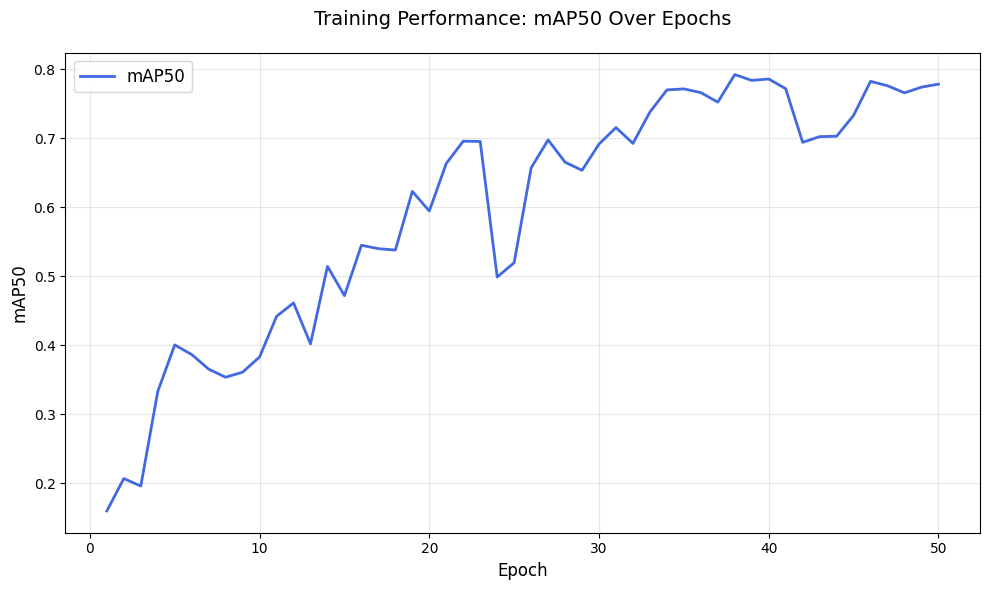

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training metrics
metrics_path = '/content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab/results.csv'

#if not works meansgive this path '/content/drive/MyDrive/Garbage_detection_model/runs/detect/garbage_detection_colab/results.csv'
metrics = pd.read_csv(metrics_path)

# Create performance plot
plt.figure(figsize=(10, 6))
plt.plot(metrics['epoch'], metrics['metrics/mAP50(B)'],
         label='mAP50', linewidth=2, color='royalblue')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('mAP50', fontsize=12)
plt.title('Training Performance: mAP50 Over Epochs', fontsize=14, pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**8. Model Evaluation on Test Set**

      Validate your trained model's performance on unseen data

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('/content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab/weights/best.pt')

# Evaluate on validation set
metrics = model.val(
    data='/content/drive/MyDrive/Garbage_detection_model/data.yaml',
    split='val',  # Ensure 'val' is defined in data.yaml
    batch=16,     # Match your training batch size
    conf=0.5,     # Confidence threshold
    iou=0.45,     # IoU threshold
    save_json=True,  # Save results to JSON
    save_hybrid=True,  # Save hybrid version of labels
    project='/content/drive/MyDrive/Garbage_detection_model/run/val',  # Custom save location
    name='eval_results'
)

print(f"mAP50-95: {metrics.box.map}")  # Print mean Average Precision
print(f"mAP50: {metrics.box.map50}")   # Print mAP@0.5

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in in the future.
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 17.9±9.8 MB/s, size: 32.2 KB)


val: Scanning /content/drive/MyDrive/Garbage_detection_model/val/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


                   all         50         50      0.809      0.616      0.746      0.729
                 Metal          7          7          1      0.286      0.643      0.643
                 Paper         15         15      0.778      0.933      0.938      0.903
               Plastic          5          5      0.429        0.6      0.569      0.569
          Random Trash          5          5          1        0.2        0.6        0.6
             cardboard         11         11        0.9      0.818        0.9      0.879
                 glass          7          7       0.75      0.857      0.827      0.783
Speed: 9.6ms preprocess, 9.3ms inference, 0.0ms loss, 4.5ms postprocess per image
Saving /content/drive/MyDrive/Garbage_detection_model/run/val/eval_results/predictions.json...
Results saved to /content/drive/MyDrive/Garbage_detection_model/run/val/eval_results
mAP50-95: 0.729328570961718
mAP50: 0.745951573295985


**Verify the run folder exist**

In [ ]:
!ls -la "/content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab"

total 5949
-rw------- 1 root root   1682 Jul  7 11:34 args.yaml
-rw------- 1 root root 272725 Jul  7 11:37 BoxF1_curve.png
-rw------- 1 root root 252377 Jul  7 11:37 BoxP_curve.png
-rw------- 1 root root 133397 Jul  7 11:37 BoxPR_curve.png
-rw------- 1 root root 205106 Jul  7 11:37 BoxR_curve.png
-rw------- 1 root root 195489 Jul  7 11:37 confusion_matrix_normalized.png
-rw------- 1 root root 151246 Jul  7 11:37 confusion_matrix.png
-rw------- 1 root root 176121 Jul  7 11:34 labels_correlogram.jpg
-rw------- 1 root root 170521 Jul  7 11:34 labels.jpg
-rw------- 1 root root   6142 Jul  7 11:37 results.csv
-rw------- 1 root root 335107 Jul  7 11:37 results.png
-rw------- 1 root root 479966 Jul  7 11:34 train_batch0.jpg
-rw------- 1 root root 416863 Jul  7 11:34 train_batch1.jpg
-rw------- 1 root root 458309 Jul  7 11:34 train_batch2.jpg
-rw------- 1 root root 367582 Jul  7 11:37 train_batch440.jpg
-rw------- 1 root root 359443 Jul  7 11:37 train_batch441.jpg
-rw------- 1 root root 368994

**9. Model Deployment for Inference**

      Run your trained garbage detection model on new images and videos

**1. Image Detection (Detect objects in single images).**


image 1/1 /content/drive/MyDrive/Garbage_detection_model/glass.jpg: 640x640 1 glass, 7.4ms
Speed: 3.6ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict16
1 label saved to runs/detect/predict16/labels


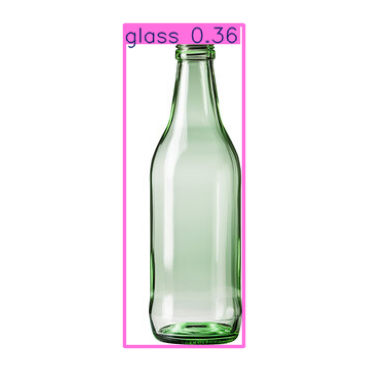

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load trained model
model = YOLO("/content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab/weights/best.pt")

# Run prediction
results = model.predict(
    source="/content/drive/MyDrive/Garbage_detection_model/glass.jpg",
    conf=0.25,          # Confidence threshold (adjust as needed)
    save=True,         # Saves to 'runs/detect/predict'
    save_txt=True,     # Save labels as .txt files
    save_conf=True,    # Save confidence scores in labels
    show=True,         # Display results inline (Colab/Jupyter)
    show_labels=True,  # Show class labels
    show_conf=True     # Show confidence scores
)

# Display results
for result in results:
    plt.imshow(result.plot()[:,:,::-1])  # Convert BGR to RGB
    plt.axis('off')
    plt.show()

In [ ]:
# Evaluate on your validation set
metrics = model.val(data='/content/drive/MyDrive/Garbage_detection_model/data.yaml')
print(metrics.box.map)  # mAP score

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 13.9±2.8 MB/s, size: 23.6 KB)


val: Scanning /content/drive/MyDrive/Garbage_detection_model/val/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]


                   all         50         50      0.684      0.672      0.778      0.753
                 Metal          7          7          1       0.42      0.875      0.875
                 Paper         15         15      0.701      0.933      0.944      0.894
               Plastic          5          5      0.352        0.6      0.592      0.576
          Random Trash          5          5       0.63        0.4      0.486      0.486
             cardboard         11         11      0.797      0.818      0.956      0.928
                 glass          7          7      0.623      0.857      0.813      0.757
Speed: 5.8ms preprocess, 12.8ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val3
0.7527070628103244


**2. Video Detection (Process video files frame-by-frame)**

In [ ]:
from ultralytics import YOLO
from IPython.display import HTML, display
from base64 import b64encode
import os

# Load model
model = YOLO('/content/drive/MyDrive/Garbage_detection_model/run/detect/garbage_detection_colab/weights/best.pt')

# Video prediction
video_path = '/content/drive/MyDrive/Garbage_detection_model/glassvideo.mp4'
video_results = model.predict(
    source=video_path,
    conf=0.45,
    save=True,         # Saves to 'runs/detect/predict'
    save_txt=True,
    imgsz=640,
    stream=True,
    show_conf=True
)

# Process all frames (needed for stream=True)
for _ in video_results:
    pass

# Find the saved video (it will have the same name as input but in the predict folder)
input_filename = os.path.basename(video_path)
output_dir = '/content/runs/detect/predict/'  # Default YOLO output directory
output_path = os.path.join(output_dir, input_filename)

# Alternative output path if you're using save_dir parameter
# output_dir = '/content/drive/MyDrive/Garbage_detection_model/run/detect/predict/'
# output_path = os.path.join(output_dir, input_filename)

# Verify the file exists
if os.path.exists(output_path):
    # Display processed video in Colab
    mp4 = open(output_path, 'rb').read()
    display(HTML(f"""
    <video width=600 controls autoplay loop>
      <source src="data:video/mp4;base64,{b64encode(mp4).decode()}">
    </video>
    """))
else:
    print(f"Output video not found at: {output_path}")
    print("Checking default locations...")
    # Try to find the file in other likely locations
    possible_locations = [
        '/content/runs/detect/predict/',
        '/content/drive/MyDrive/Garbage_detection_model/run/detect/predict/',
        '/content/ultralytics/runs/detect/predict/'
    ]

    found = False
    for loc in possible_locations:
        test_path = os.path.join(loc, input_filename)
        if os.path.exists(test_path):
            mp4 = open(test_path, 'rb').read()
            display(HTML(f"""
            <video width=600 controls autoplay loop>
              <source src="data:video/mp4;base64,{b64encode(mp4).decode()}">
            </video>
            """))
            found = True
            break

    if not found:
        print("Could not find output video. Check these locations manually:")
        for loc in possible_locations:
            print(f"- {os.path.join(loc, input_filename)}")


video 1/1 (frame 1/348) /content/drive/MyDrive/Garbage_detection_model/glassvideo.mp4: 640x384 (no detections), 35.4ms
video 1/1 (frame 2/348) /content/drive/MyDrive/Garbage_detection_model/glassvideo.mp4: 640x384 (no detections), 7.3ms
video 1/1 (frame 3/348) /content/drive/MyDrive/Garbage_detection_model/glassvideo.mp4: 640x384 (no detections), 9.3ms
video 1/1 (frame 4/348) /content/drive/MyDrive/Garbage_detection_model/glassvideo.mp4: 640x384 (no detections), 10.5ms
video 1/1 (frame 5/348) /content/drive/MyDrive/Garbage_detection_model/glassvideo.mp4: 640x384 (no detections), 8.3ms
video 1/1 (frame 6/348) /content/drive/MyDrive/Garbage_detection_model/glassvideo.mp4: 640x384 (no detections), 7.9ms
video 1/1 (frame 7/348) /content/drive/MyDrive/Garbage_detection_model/glassvideo.mp4: 640x384 (no detections), 12.1ms
video 1/1 (frame 8/348) /content/drive/MyDrive/Garbage_detection_model/glassvideo.mp4: 640x384 (no detections), 8.4ms
video 1/1 (frame 9/348) /content/drive/MyDrive/Garba

# **Finally object Detection was successfully executed..**